In [8]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'ffhq-399808' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=ffhq-399808:US:bquxjob_2f3f66b7_18ad60d48f3)
back to BigQuery to edit the query within the BigQuery user interface.

In [9]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_2f3f66b7_18ad60d48f3') # Job ID inserted based on the query results selected to explore
print(job.query)

WITH PreviousActions AS (
    SELECT 
        user_pseudo_id,
        event_name,
        event_timestamp,
        event_date
    FROM 
        `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_*`
    WHERE 
        event_name IN ('view_item', 'user_engagement', 'add_to_cart')
),

CartActions AS (
    SELECT 
        user_pseudo_id,
        event_timestamp AS cart_timestamp
    FROM 
        `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_*`
    WHERE 
        event_name = 'add_to_cart'
),

FilteredActions AS (
    SELECT 
        p.user_pseudo_id,
        p.event_name,
        p.event_timestamp,
        p.event_date
    FROM 
        PreviousActions p
    JOIN 
        CartActions c
    ON 
        p.user_pseudo_id = c.user_pseudo_id
    WHERE 
        p.event_timestamp <= c.cart_timestamp
),

DesiredPath AS (
    SELECT 
        user_pseudo_id,
        COUNTIF(event_name = 'view_item') AS view_count,
        COUNTIF(event_name = 'user_engagement') AS engagemen

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [10]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_2f3f66b7_18ad60d48f3') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,week_start,weekly_avg_session_duration,weekly_unique_days,weekly_last_week_activity_ratio,weekly_last_4weeks_activity_ratio,weekly_total_events,weekly_avg_spend_per_event,weekly_mobile_usage_ratio,weekly_desktop_usage_ratio,weekly_target
0,2020-10-26,3.396533e+09,1.498497,0.0,0.0,29195.532201,49.866839,0.398714,0.585769,0.018355
1,2020-11-02,4.223581e+09,1.823419,0.0,0.0,38659.928433,79.432142,0.408970,0.571822,0.037620
2,2020-11-09,4.373807e+09,1.990395,0.0,0.0,37928.706976,75.651068,0.399468,0.580104,0.054275
3,2020-11-16,4.307549e+09,2.037602,0.0,0.0,36463.350237,92.656745,0.409515,0.567695,0.180020
4,2020-11-23,4.006102e+09,1.999665,0.0,0.0,35422.698418,86.554214,0.391355,0.581441,0.306374
5,2020-11-30,3.622125e+09,2.091552,0.0,0.0,44483.175281,85.610221,0.391967,0.587701,0.500477
6,2020-12-07,3.595700e+09,2.099568,0.0,0.0,46557.600530,90.992729,0.385086,0.597471,0.473505
7,2020-12-14,3.788273e+09,2.148339,0.0,0.0,44985.434171,89.816114,0.402011,0.576659,0.428456
8,2020-12-21,3.793974e+09,2.005034,0.0,0.0,27875.846872,69.635163,0.410267,0.564615,0.328378
9,2020-12-28,3.325459e+09,1.784929,0.0,0.0,23965.058401,82.436896,0.383807,0.594307,0.244138


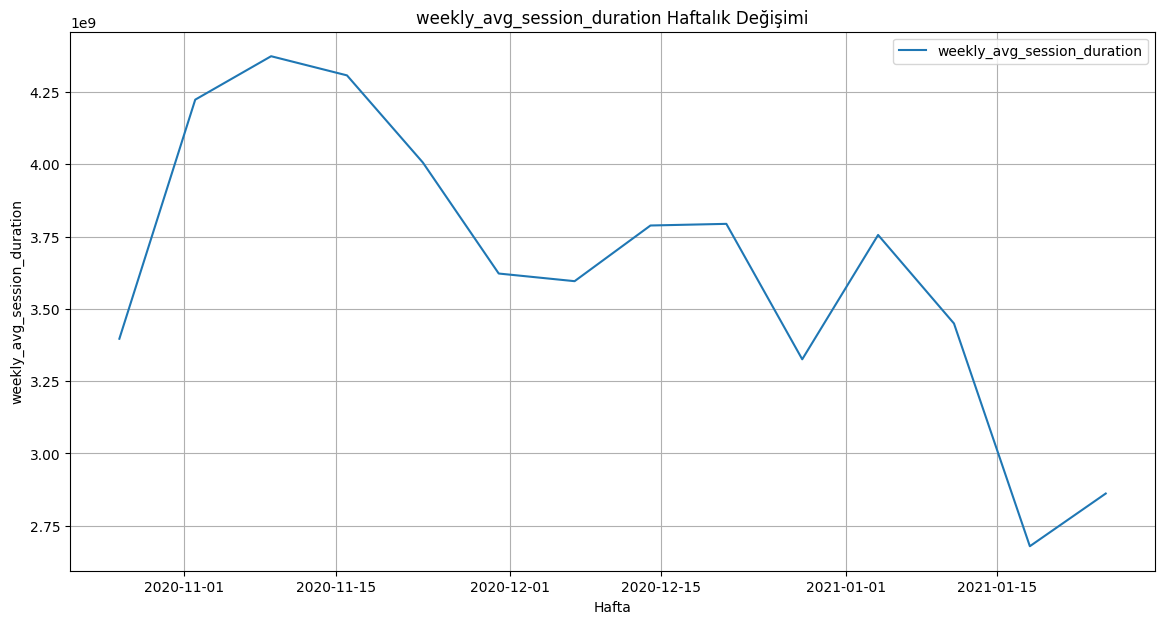

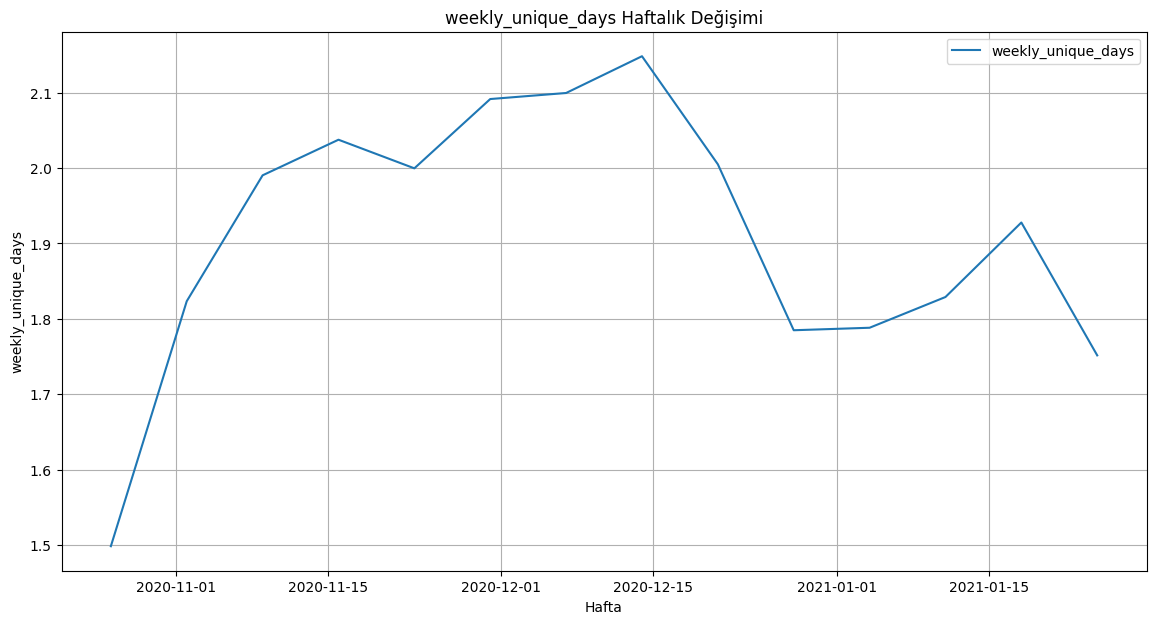

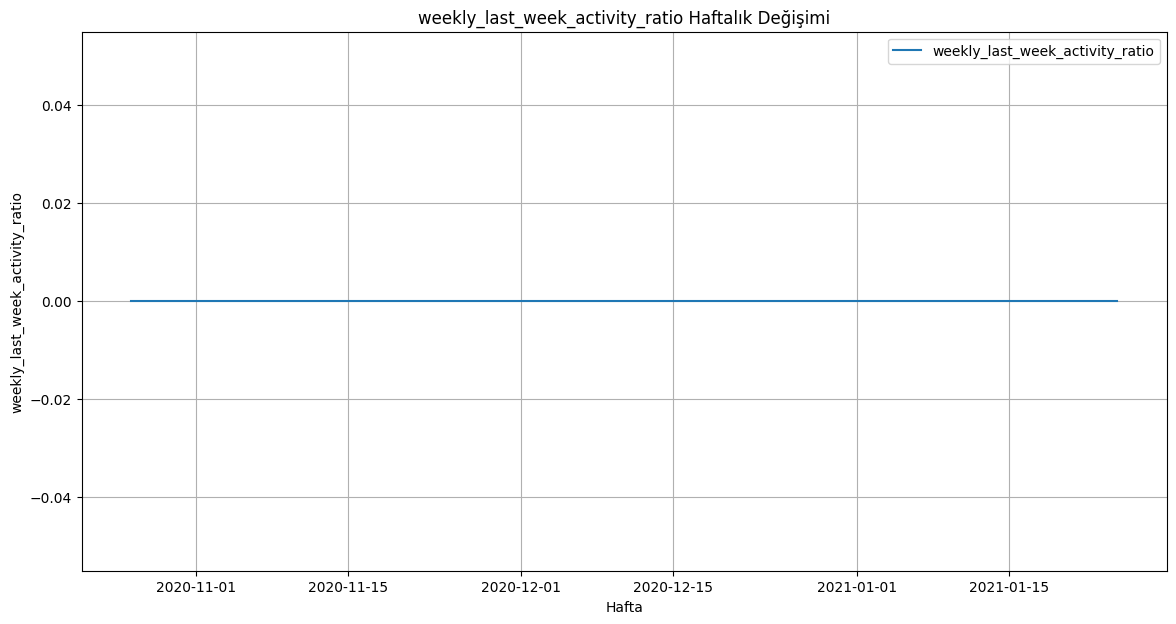

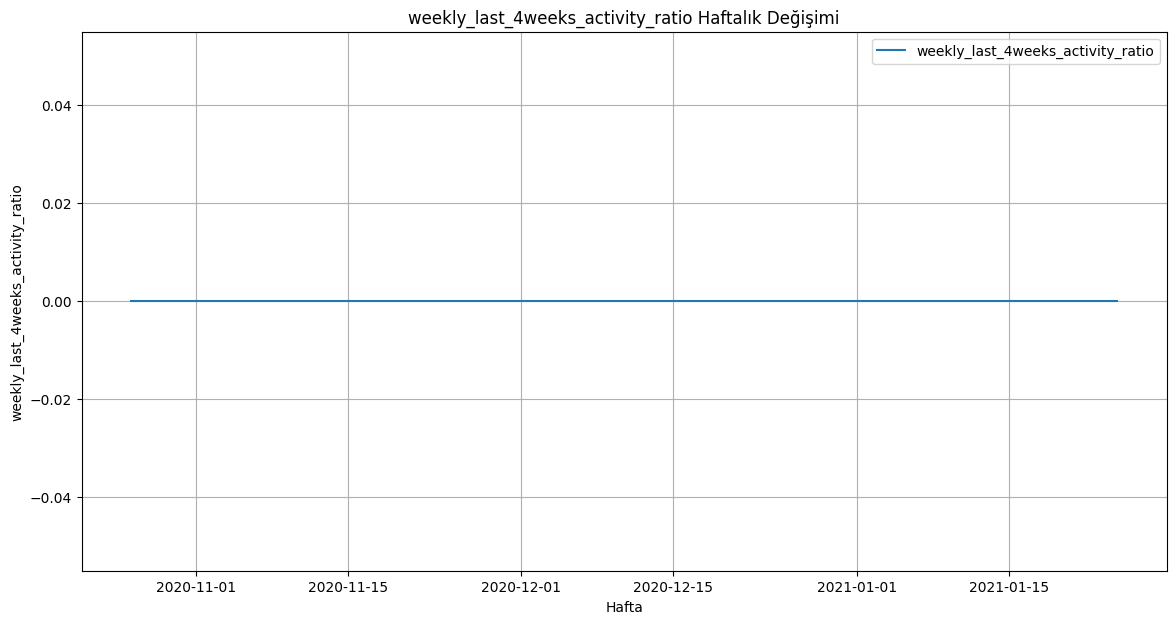

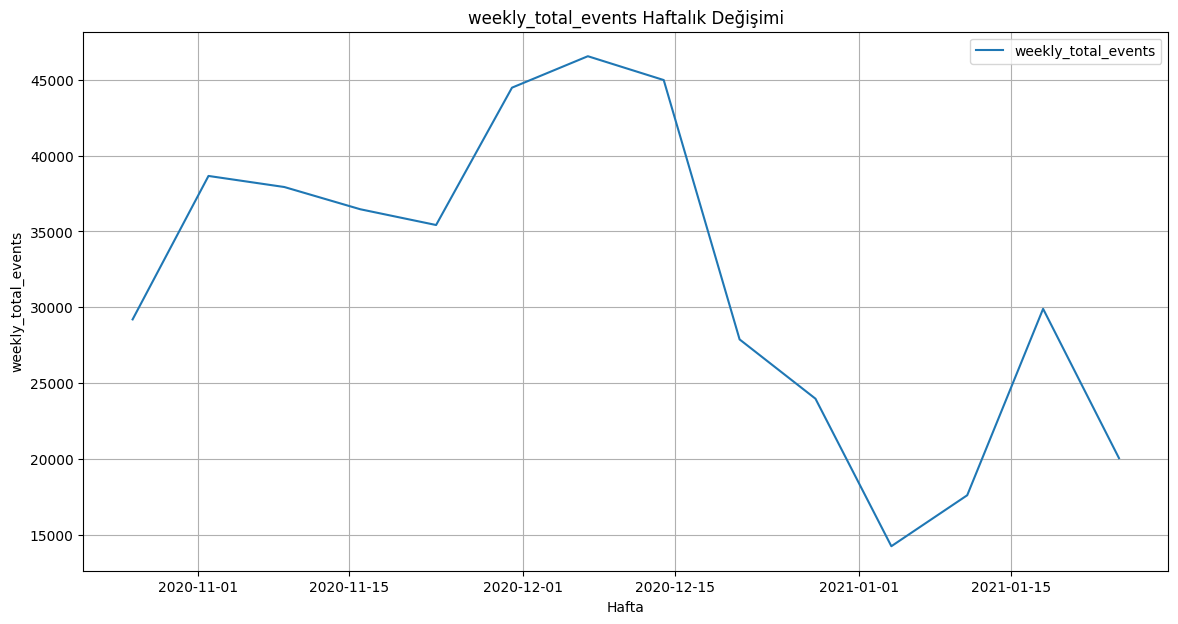

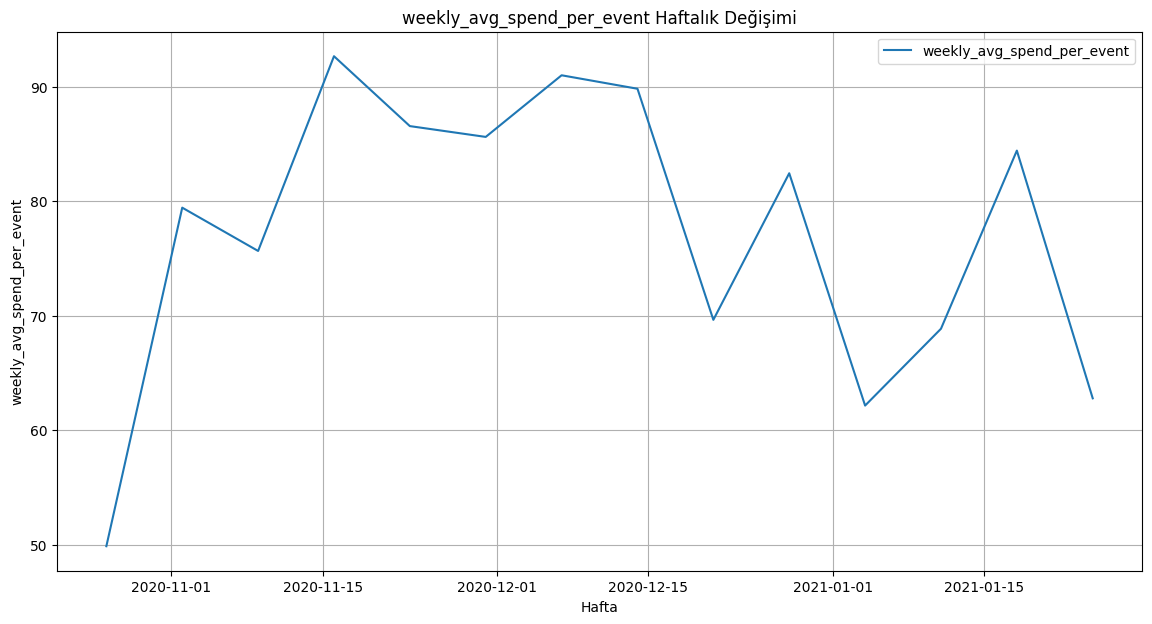

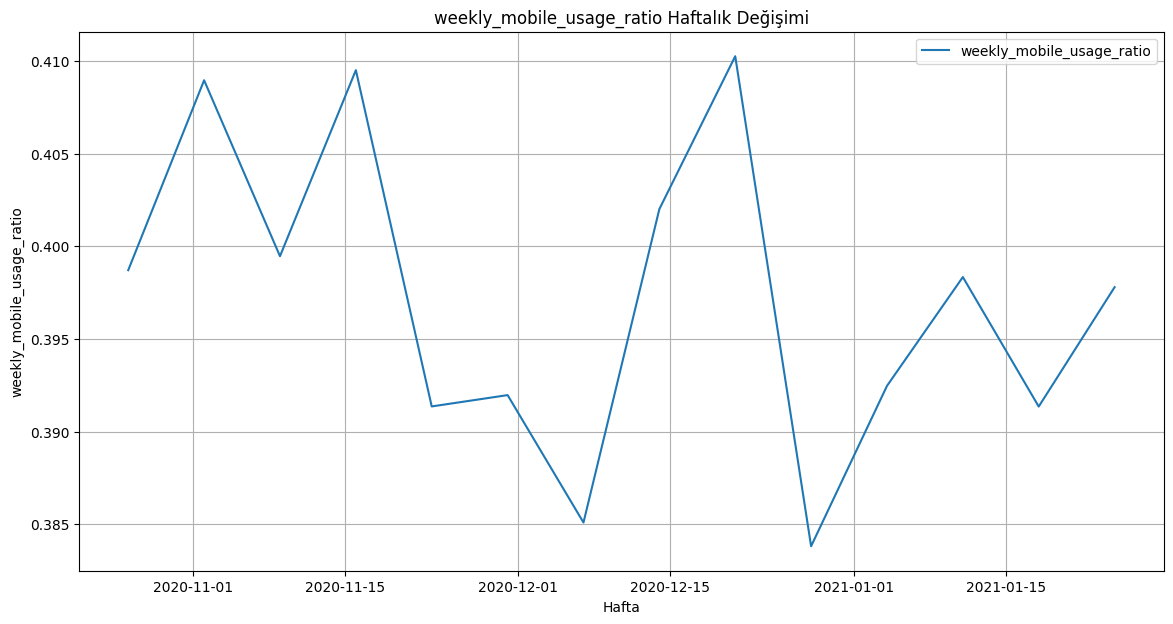

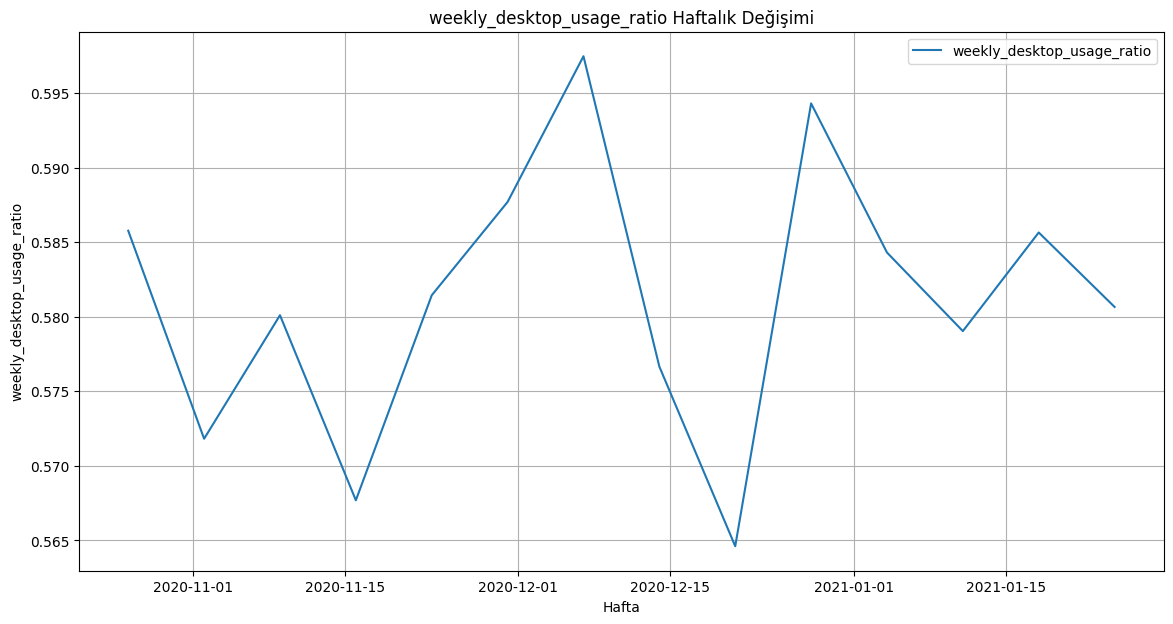

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Take dataframe from Bigquery
df = pd.DataFrame(results)

# Plot Weekly changes
features = [col for col in df.columns if col != 'week_start' and col != 'weekly_target']

for feature in features:
    plt.figure(figsize=(14,7))
    plt.plot(pd.to_datetime(df['week_start']), df[feature], label=feature)
    plt.title(f'{feature} Haftalık Değişimi')
    plt.xlabel('Hafta')
    plt.ylabel(feature)
    plt.grid(True)
    plt.legend()
    plt.show()



In [13]:
#install libraries
pip install pandas matplotlib seaborn numpy


<ipython-input-14-f247b935e565>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


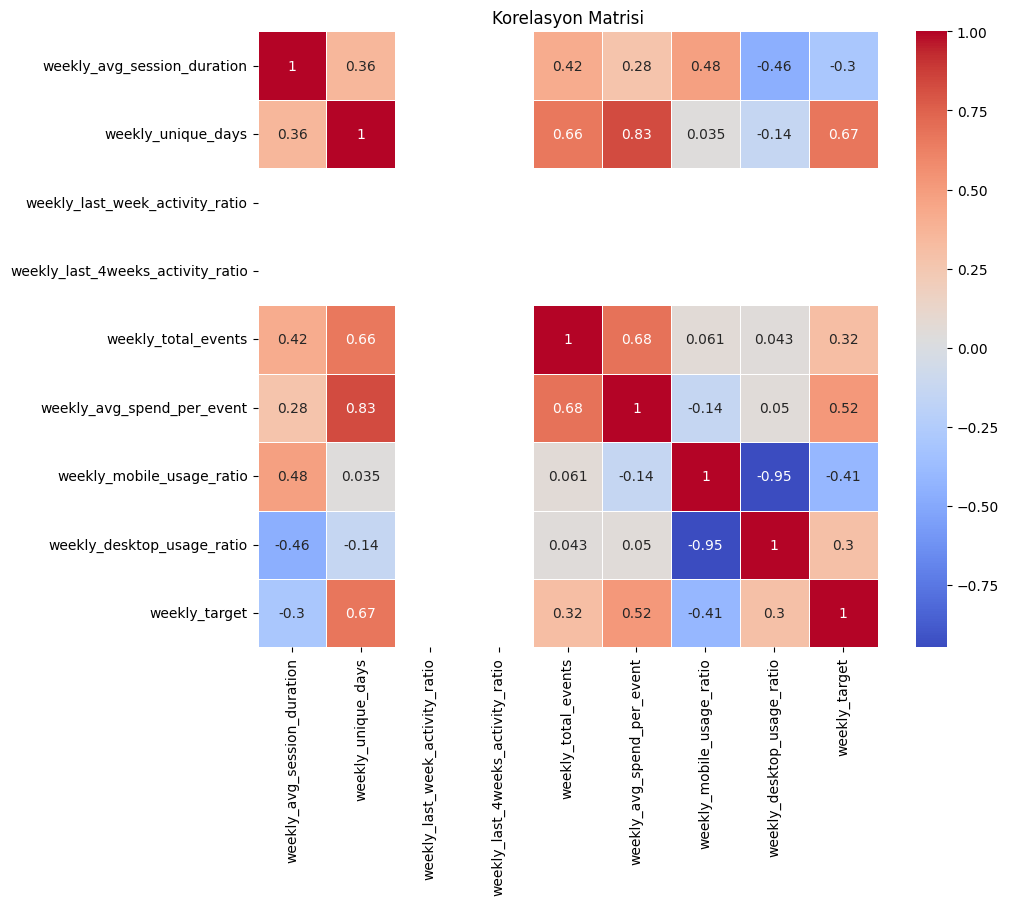

In [14]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data to dataframe
df = pd.DataFrame(results)

# Calculate matrix
correlation_matrix = df.corr()

# plot matrix visual
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasyon Matrisi')
plt.show()


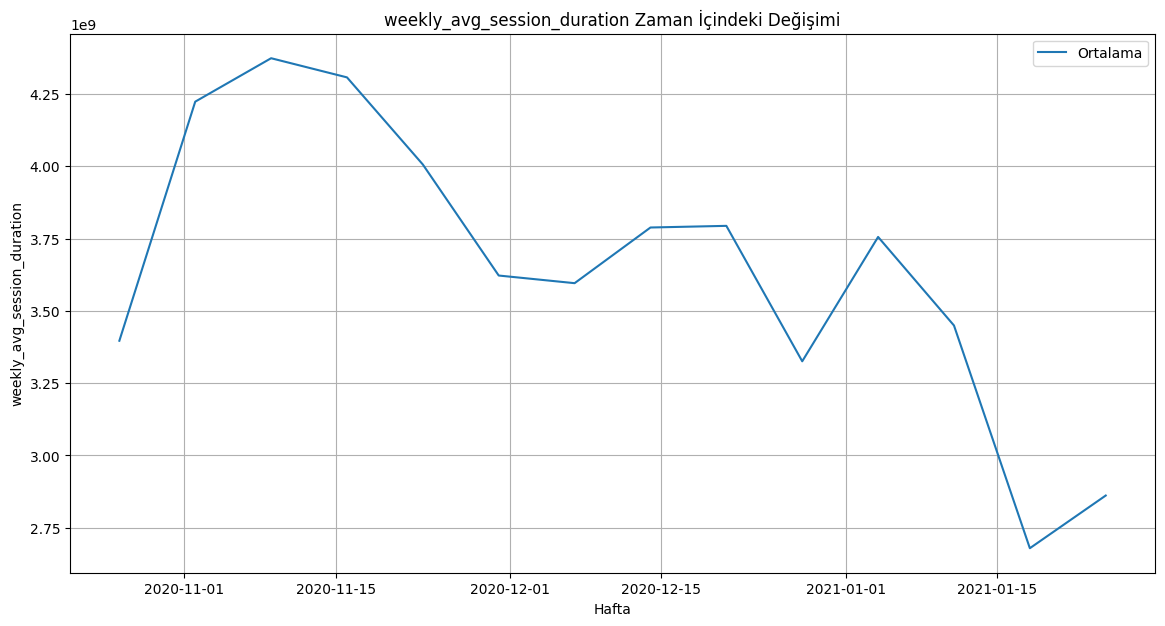

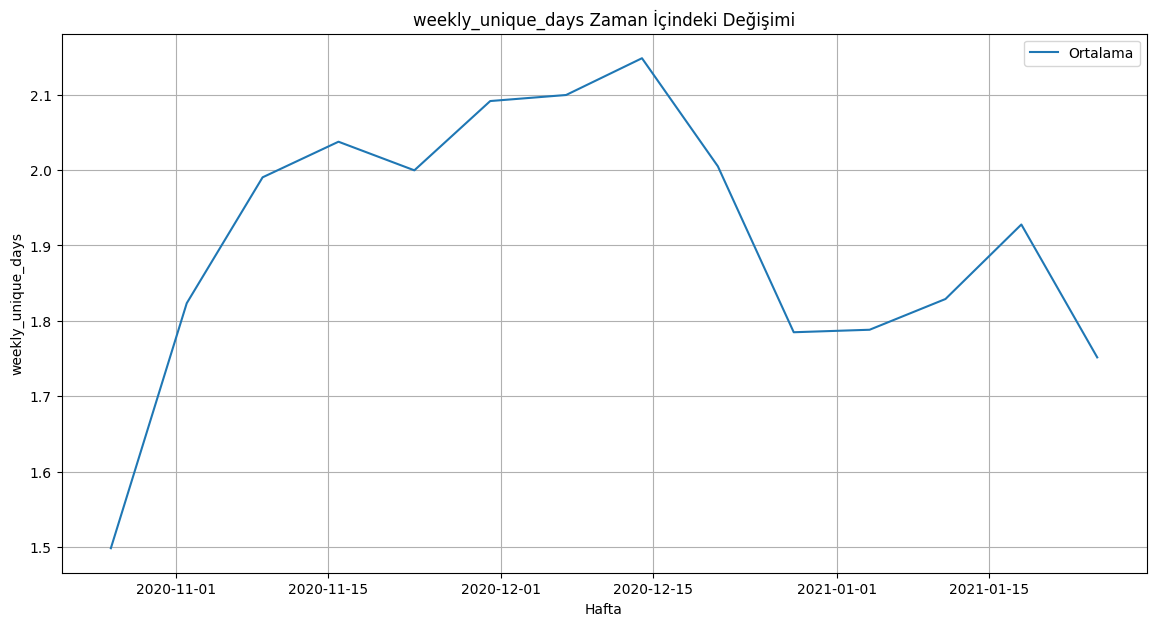

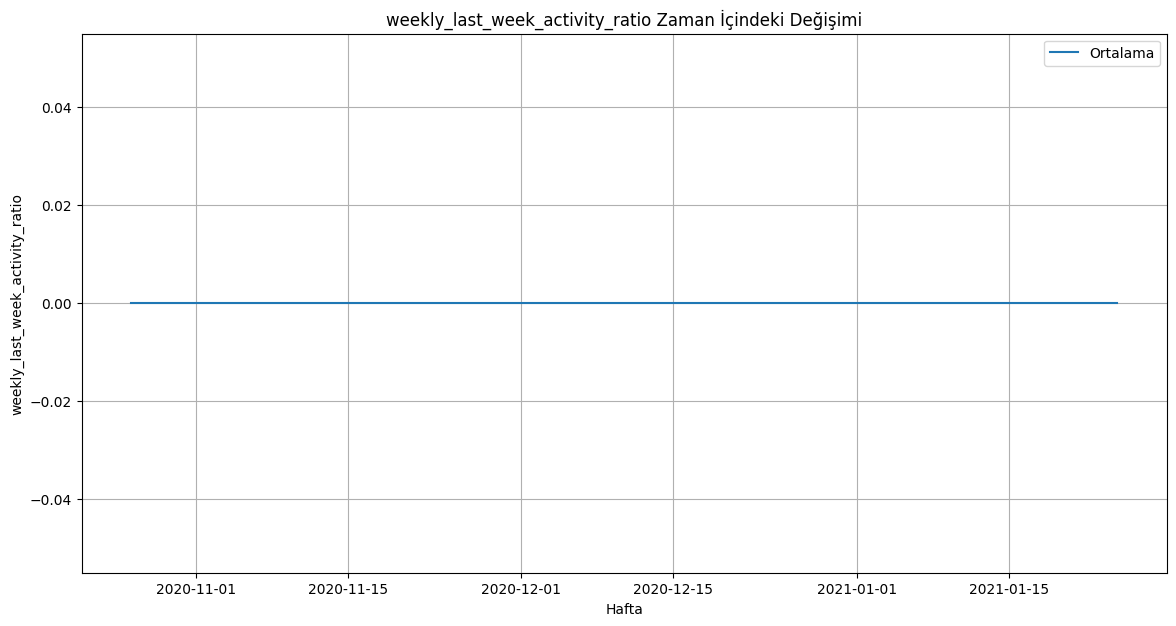

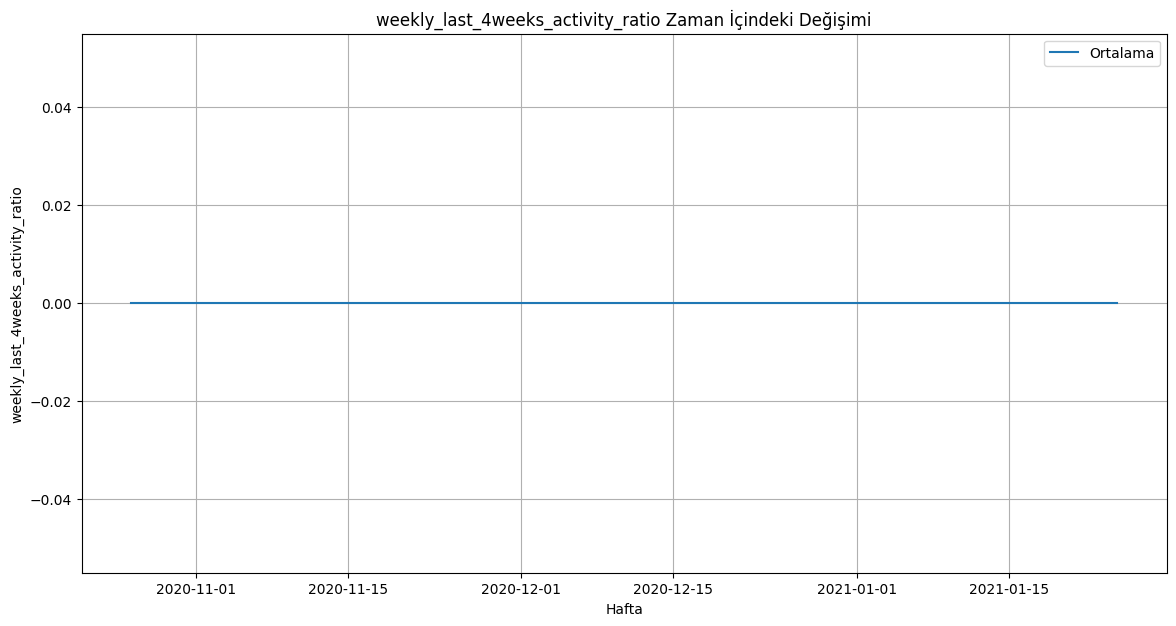

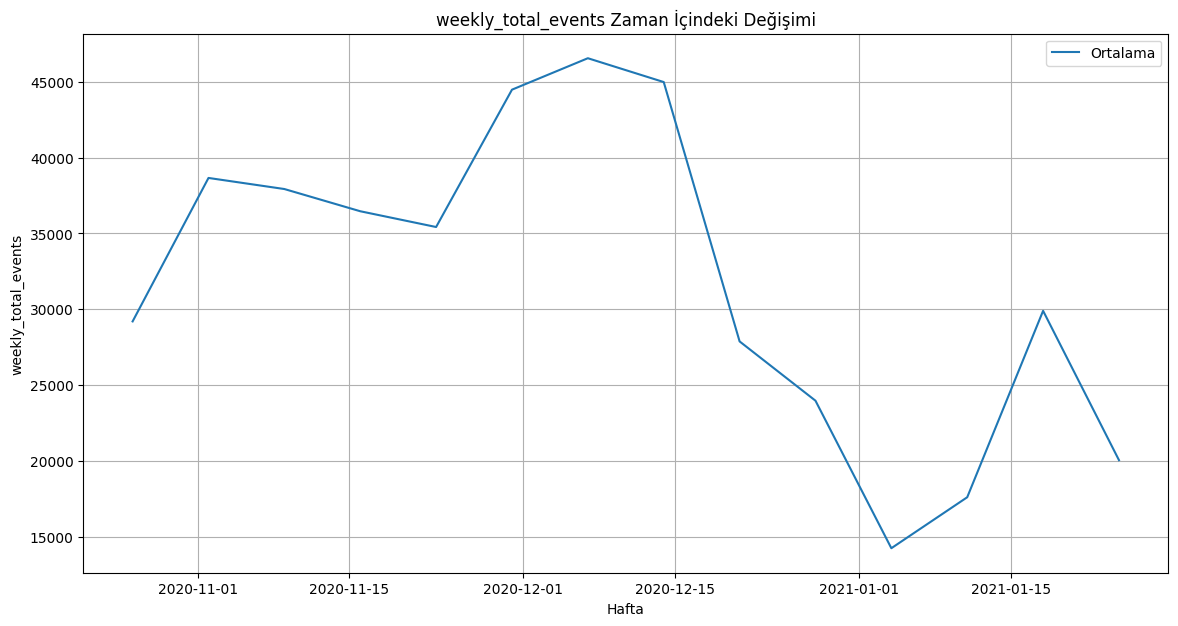

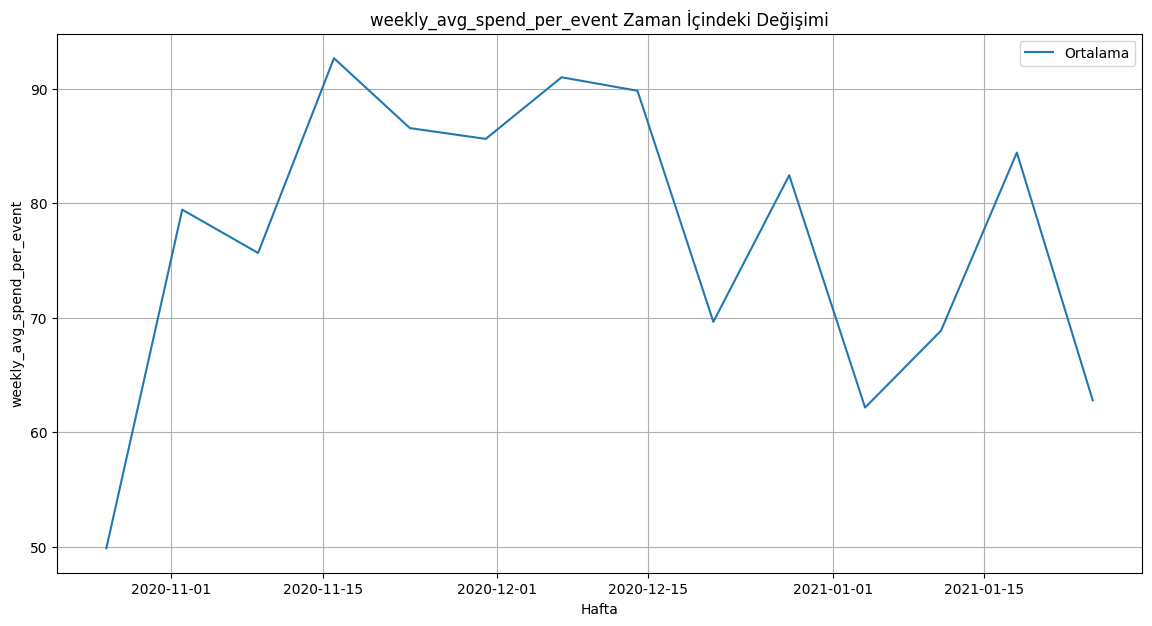

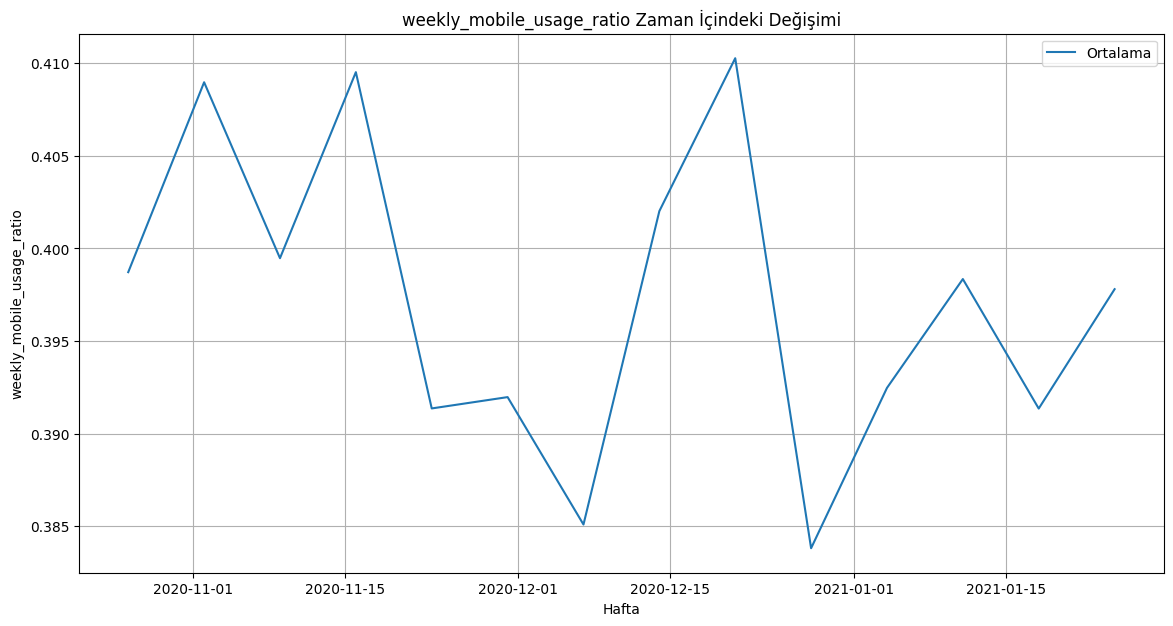

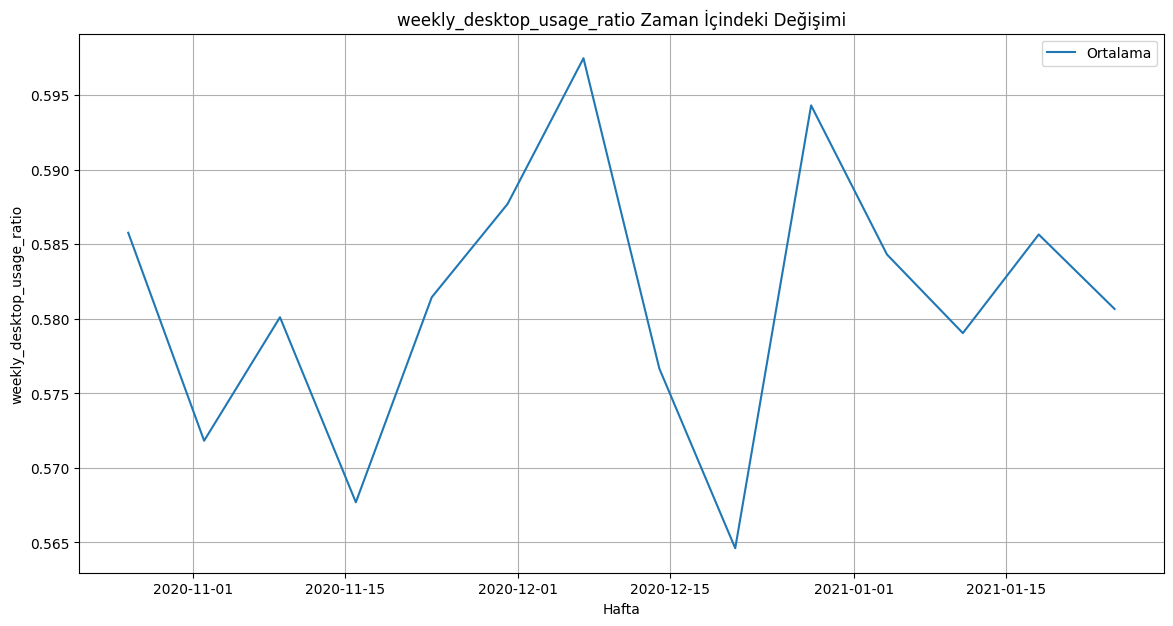

In [15]:
features = [col for col in df.columns if col != 'week_start' and col != 'weekly_target']

for feature in features:
    weekly_mean = df.groupby('week_start')[feature].mean()
    weekly_std = df.groupby('week_start')[feature].std()

    plt.figure(figsize=(14,7))
    plt.plot(weekly_mean.index, weekly_mean, label='Ortalama')
    plt.fill_between(weekly_std.index, weekly_mean - weekly_std, weekly_mean + weekly_std, alpha=0.3)
    plt.title(f'{feature} Zaman İçindeki Değişimi')
    plt.xlabel('Hafta')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()


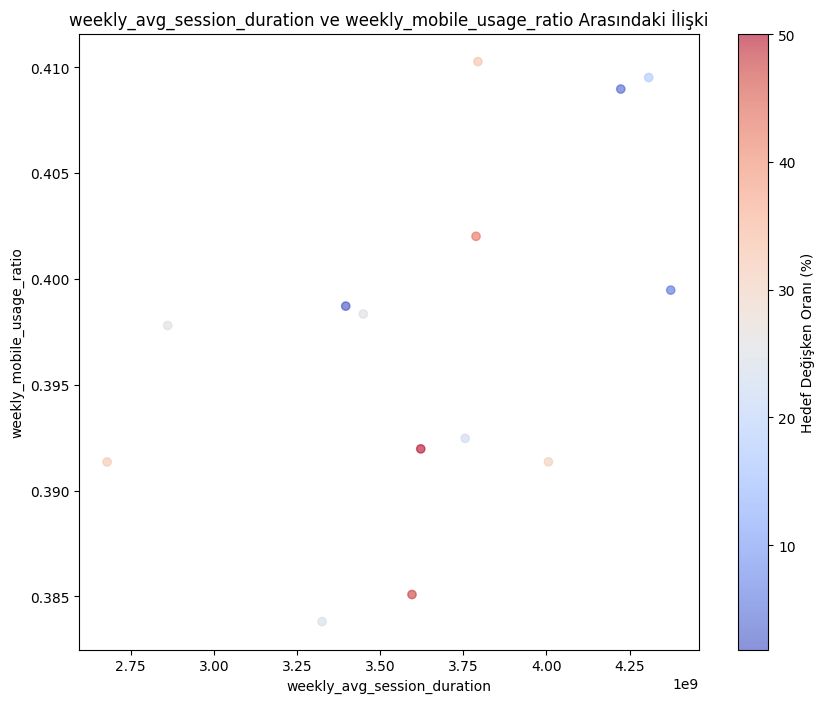

In [16]:

feature1 = 'weekly_avg_session_duration'
feature2 = 'weekly_mobile_usage_ratio'

plt.figure(figsize=(10,8))
scatter = plt.scatter(df[feature1], df[feature2], c=df['weekly_target']*100, cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Hedef Değişken Oranı (%)')
plt.title(f'{feature1} ve {feature2} Arasındaki İlişki')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()


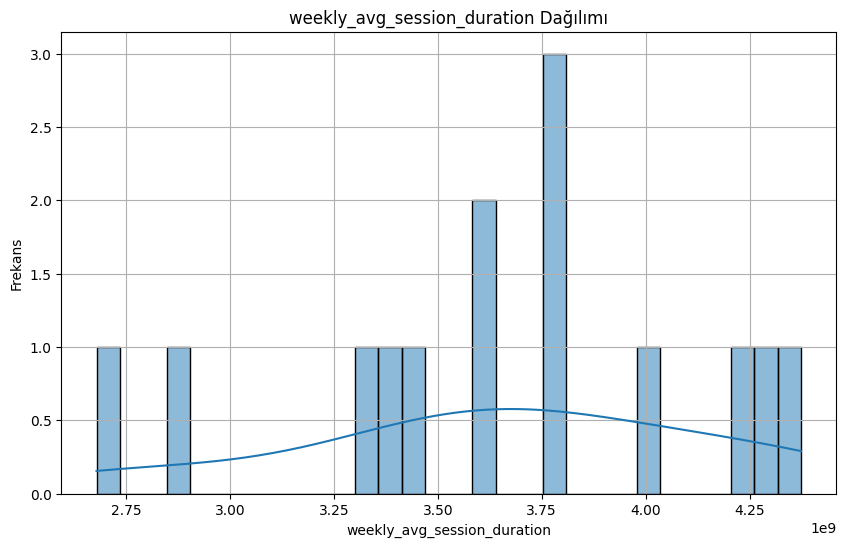

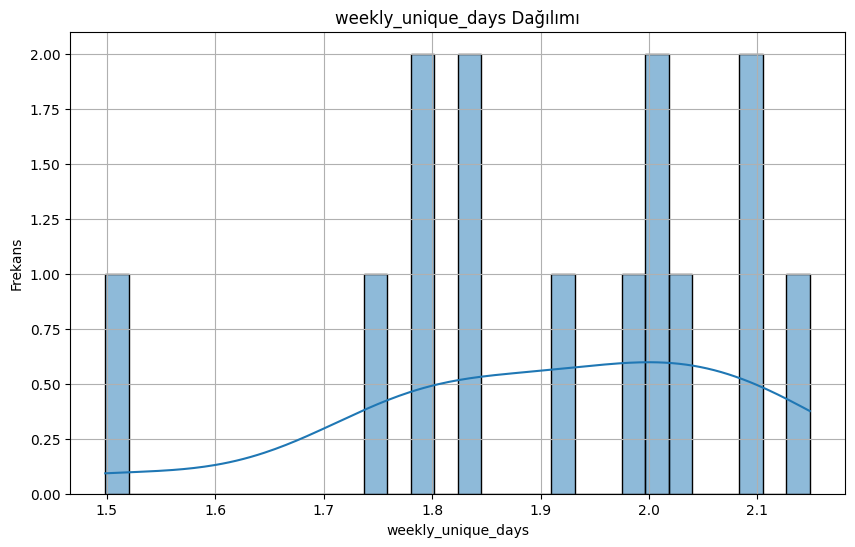

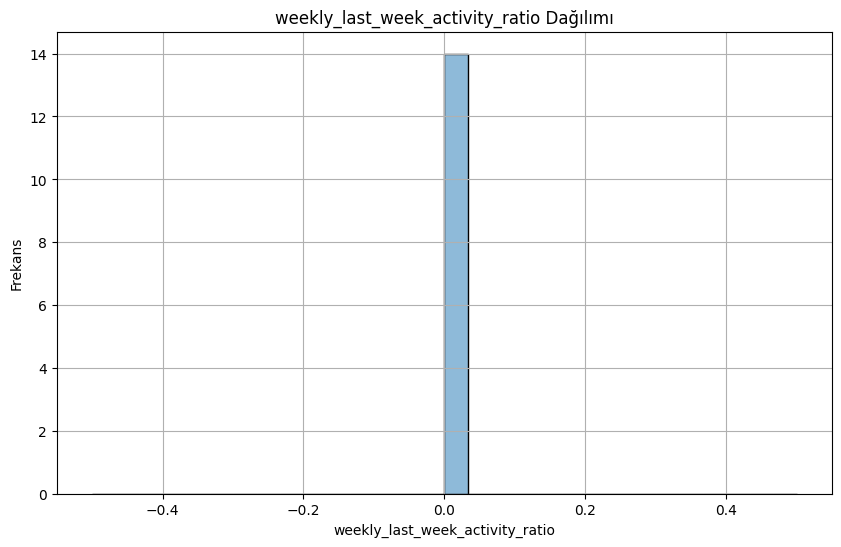

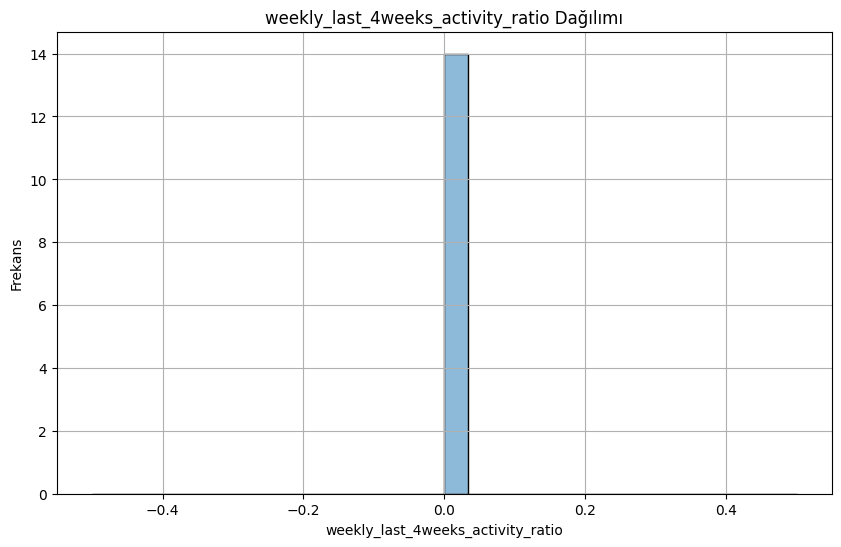

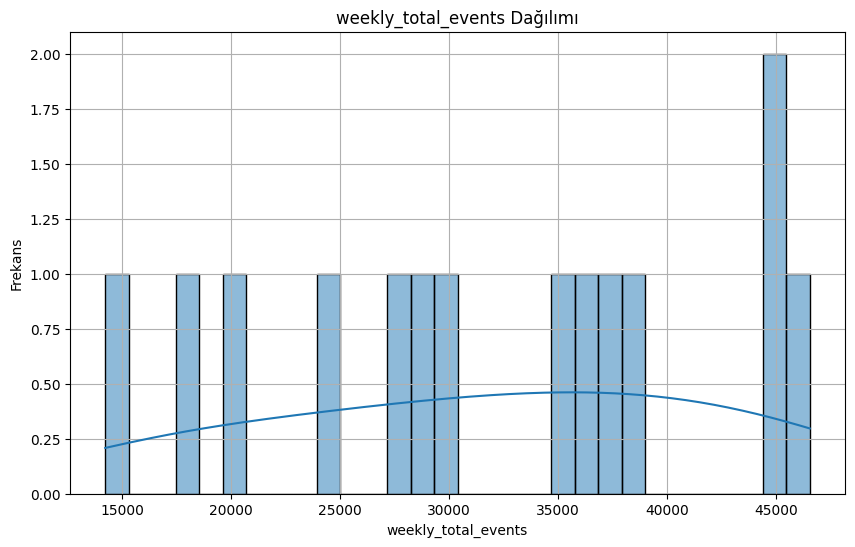

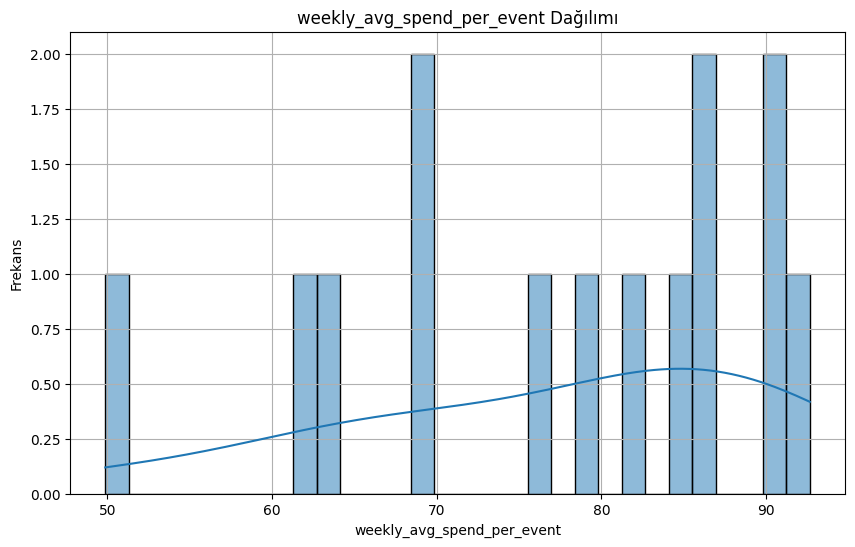

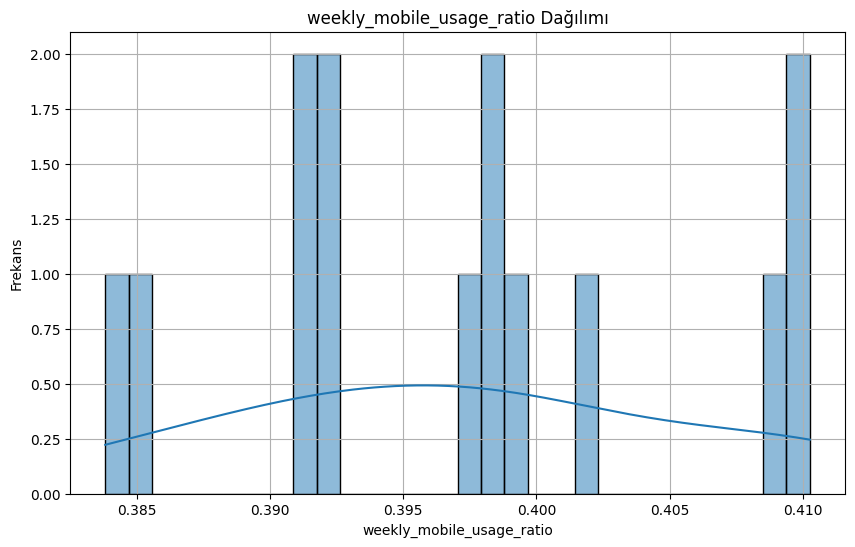

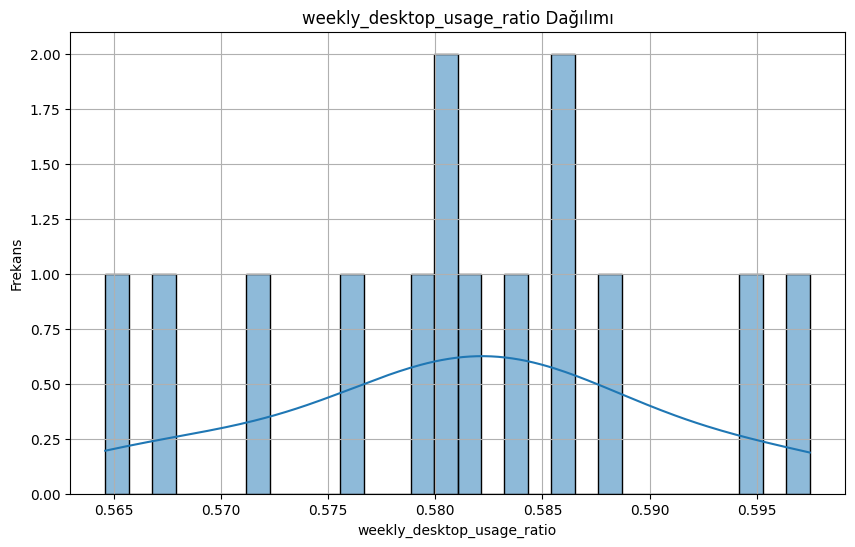

In [17]:
for feature in features:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    plt.title(f'{feature} Dağılımı')
    plt.xlabel(feature)
    plt.ylabel('Frekans')
    plt.grid(True)
    plt.show()


In [25]:
pip install shap xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.2 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


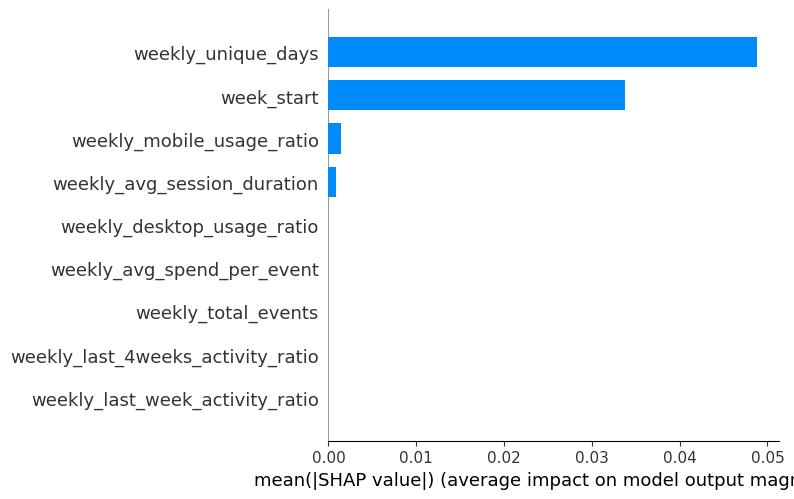

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


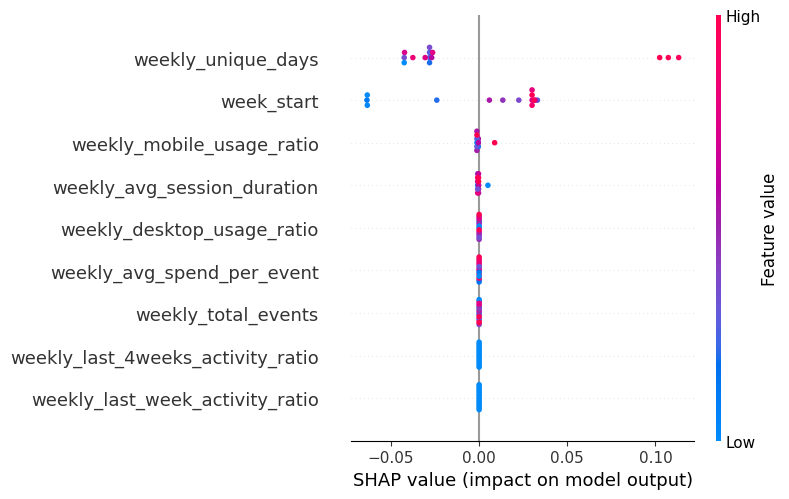

In [26]:
import xgboost
import shap
import pandas as pd
import matplotlib.pyplot as plt

#load data from Bigquery
df = pd.DataFrame(results)

# Özellikler ve hedef değişkeni ayır
X = df.drop(columns=['weekly_target'])  # 'weekly_target' hedef değişkenin ismini değiştirin
y = df['weekly_target']  # Hedef değişken

# XGBoost modelini eğit
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# SHAP değerlerini hesapla
explainer = shap.Explainer(model)
shap_values = explainer(X)

# SHAP özet çizimi
shap.summary_plot(shap_values, X, plot_type="bar")

# İsteğe bağlı: Bireysel örneklerin SHAP değerlerini göster
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

# Tüm özelliklerin SHAP değerlerini görselleştir
shap.summary_plot(shap_values, X)


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()